In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import datetime

In [2]:
start = '1990-01-01'

In [3]:
end = '2020-12-31'

In [4]:
df = pdr.get_data_yahoo('AAPL', start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.264117,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265889,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266776,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267662,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269435,101572800


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.264117,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265889,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266776,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267662,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269435,101572800


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,0.314732,0.334821,0.312500,0.332589,183198400
1,0.339286,0.339286,0.334821,0.334821,207995200
2,0.341518,0.345982,0.332589,0.335938,221513600
3,0.337054,0.341518,0.330357,0.337054,123312000
4,0.334821,0.339286,0.330357,0.339286,101572800


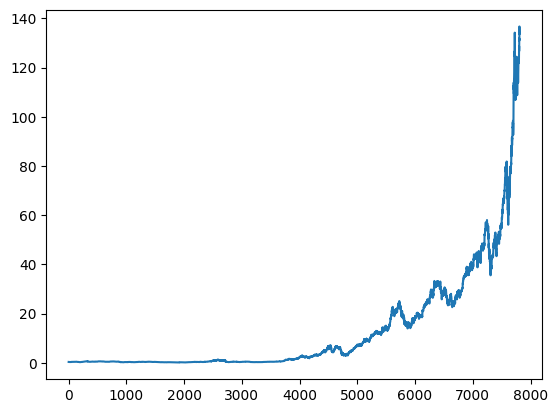

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,0.314732,0.334821,0.312500,0.332589,183198400
1,0.339286,0.339286,0.334821,0.334821,207995200
2,0.341518,0.345982,0.332589,0.335938,221513600
3,0.337054,0.341518,0.330357,0.337054,123312000
4,0.334821,0.339286,0.330357,0.339286,101572800
...,...,...,...,...,...
7806,132.160004,132.429993,130.779999,130.960007,88223700
7807,131.320007,133.460007,131.100006,131.970001,54930100
7808,133.990005,137.339996,133.509995,136.690002,124486200
7809,138.050003,138.789993,134.339996,134.869995,121047300


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
7806    118.000475
7807    118.223525
7808    118.489800
7809    118.699475
7810    118.925550
Name: Close, Length: 7811, dtype: float64

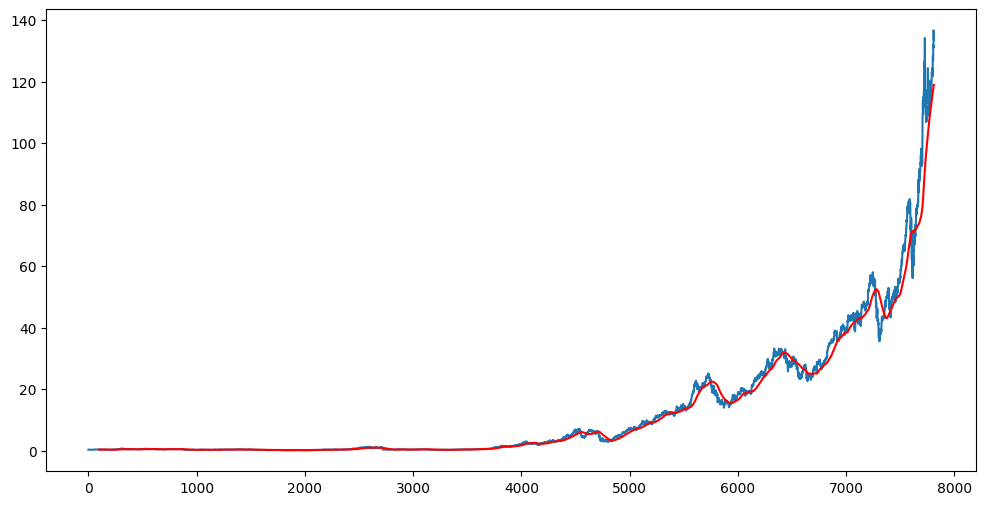

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
7806     98.809175
7807     99.158737
7808     99.494725
7809     99.866312
7810    100.218837
Name: Close, Length: 7811, dtype: float64

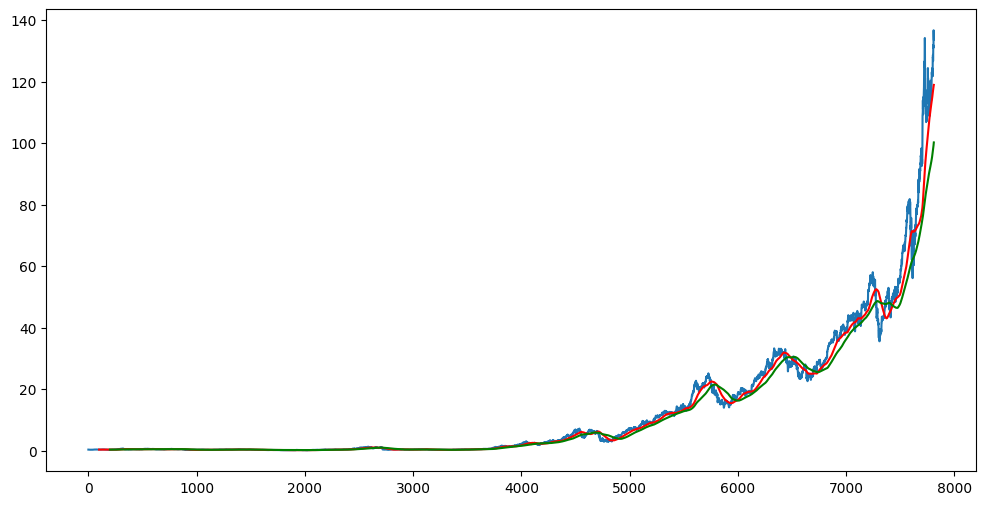

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
# Splitting data into testing and training

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.75)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.75):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(5858, 1)
(1953, 1)


In [15]:
df.shape

(7811, 5)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00869713],
       [0.00878656],
       [0.00883131],
       ...,
       [0.64224879],
       [0.62876984],
       [0.60909509]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [40]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
180/180 [==============================] - 73s 297ms/step - loss: 0.0057
Epoch 2/50
180/180 [==============================] - 53s 294ms/step - loss: 0.0024
Epoch 3/50
180/180 [==============================] - 47s 263ms/step - loss: 0.0018
Epoch 4/50
180/180 [==============================] - 51s 281ms/step - loss: 0.0018
Epoch 5/50
180/180 [==============================] - 47s 262ms/step - loss: 0.0018
Epoch 6/50
180/180 [==============================] - 50s 281ms/step - loss: 0.0018
Epoch 7/50
180/180 [==============================] - 52s 289ms/step - loss: 0.0017
Epoch 8/50
180/180 [==============================] - 53s 293ms/step - loss: 0.0014
Epoch 9/50
180/180 [==============================] - 52s 290ms/step - loss: 0.0016
Epoch 10/50
180/180 [==============================] - 53s 293ms/step - loss: 0.0014
Epoch 11/50
180/180 [==============================] - 53s 294ms/step - loss: 0.0013
Epoch 12/50
180/180 [==============================] - 52s 289ms/step - lo

In [41]:
model.save('keras_model.h5')

In [42]:
data_testing.head()

,Close
5858,15.349643
5859,15.428214
5860,15.275714
5861,15.114286
5862,15.221786


In [43]:
data_training.tail(100)

,Close
5758,20.879286
5759,20.816071
5760,19.928572
5761,19.205357
5762,19.537857
...,...
5853,16.556429
5854,16.469286
5855,16.145714
5856,15.809286


In [44]:
past_100_days = data_training.tail(100)

In [45]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [46]:
final_df.head()

,Close
0,20.879286
1,20.816071
2,19.928572
3,19.205357
4,19.537857


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05647421],
       [0.05595918],
       [0.04872861],
       ...,
       [1.        ],
       [0.98517215],
       [0.97580299]])

In [48]:
input_data.shape

(2053, 1)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [50]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1953, 100, 1)
(1953,)


In [51]:
# Making predictions

y_predicted = model.predict(x_test)

62/62 [==============================] - 20s 81ms/step


In [52]:
y_predicted.shape

(1953, 1)

In [53]:
y_test

array([0.01142345, 0.01206358, 0.01082114, ..., 1.        , 0.98517215,
       0.97580299])

In [54]:
y_predicted

array([[0.02125596],
       [0.0213355 ],
       [0.02140848],
       ...,
       [0.8854673 ],
       [0.89268243],
       [0.9002129 ]], dtype=float32)

In [55]:
scaler.scale_

array([0.00814714])

In [56]:
scale_factor = 1/0.00814714
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [57]:
y_test

array([  1.40214203,   1.48071333,   1.32821323, ..., 122.74245932,
       120.92245263, 119.77245913])

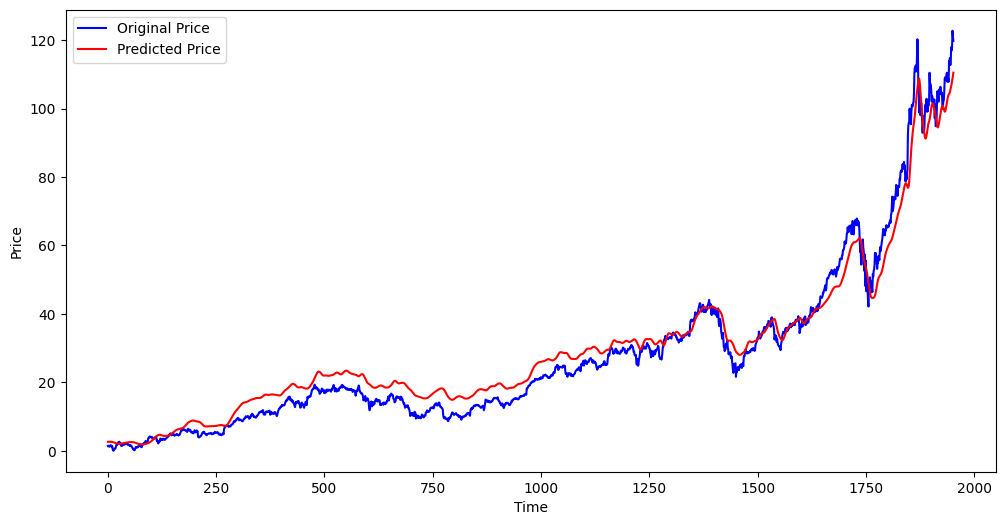

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()